In [ ]:
#Exploring dollar bills
#You will practice building classification models in Keras with the Banknote Authentication dataset.

#Your goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 features: 
#variance,skewness,kurtosis and entropy. These features are calculated by applying mathematical operations over the 
#dollar bill images. The labels are found in the dataframe's class column.

#A pandas DataFrame named banknotes is ready to use, let's do some data exploration!

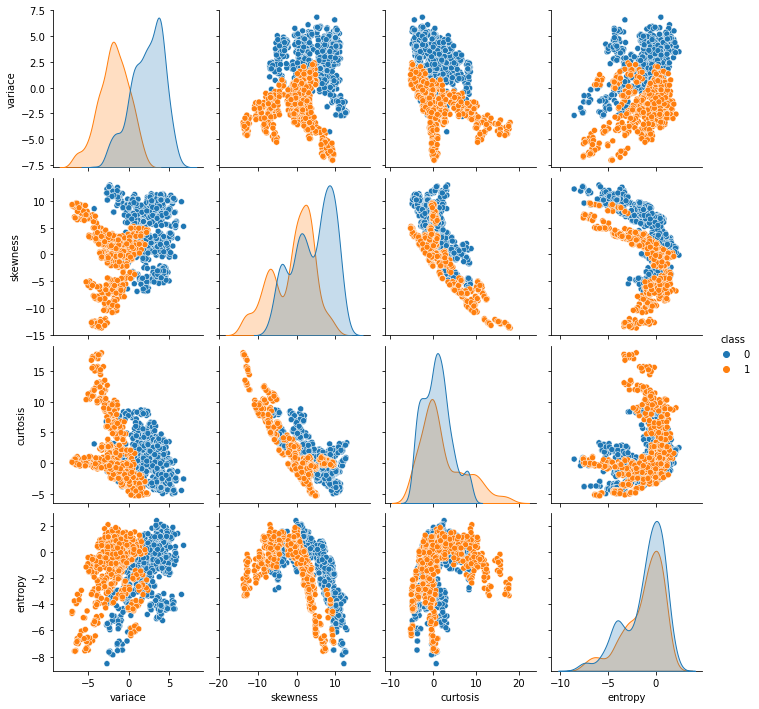

Dataset stats: 
            variace     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 0    762
1    610
Name: class, dtype: int64


In [5]:
# Import seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

banknotes = pd.read_csv('banknotes.csv')
#banknotes.head()

# Use pairplot and set the hue to be our class column
sns.pairplot(banknotes, hue='class') 

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations per class
print('Observations per class: \n', banknotes['class'].value_counts())

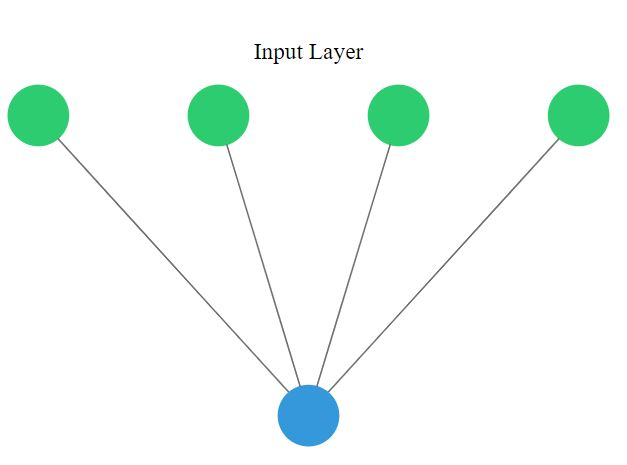

In [6]:
#A binary classification model
#Now that you know what the Banknote Authentication dataset looks like, we'll build a simple model to distinguish between 
#real and fake bills.

#You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we 
#have 4 features in our dataset. The model's output will be a value constrained between 0 and 1.

#We will interpret this output number as the probability of our input variables coming from a fake dollar bill, with 1 meaning 
#we are certain it's a fake bill.

from IPython.display import display
from IPython.display import Image
i = Image(filename='IntroKeras21.png')
display(i)

In [7]:
# Import the sequential model and dense layer
from keras.models import Sequential
from keras.layers import Dense

# Create a sequential model
model = Sequential()

# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

# Display a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 5         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [8]:
from sklearn.model_selection import train_test_split

X = banknotes.drop(['class'], axis=1).values
y = banknotes['class']

#n_cols = predictors.shape[1]
#predictors = np.asarray(predictors).astype('float32')


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)



In [9]:
#Is this dollar bill fake ?
#You are now ready to train your model and check how well it performs when classifying new bills! The dataset has already 
#been partitioned into features: X_train & X_test, and labels: y_train & y_test.


# Train your model for 20 epochs
model.fit(X_train, y_train, epochs = 20)

# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/20
29/29 [==============================] - 0s 1ms/step - loss: 0.9837 - accuracy: 0.6224
Epoch 2/20
29/29 [==============================] - 0s 1ms/step - loss: 0.5654 - accuracy: 0.7388
Epoch 3/20
29/29 [==============================] - 0s 1ms/step - loss: 0.3973 - accuracy: 0.8107
Epoch 4/20
29/29 [==============================] - 0s 1ms/step - loss: 0.3164 - accuracy: 0.8618
Epoch 5/20
29/29 [==============================] - 0s 1ms/step - loss: 0.2701 - accuracy: 0.8966
Epoch 6/20
29/29 [==============================] - 0s 1ms/step - loss: 0.2401 - accuracy: 0.9151
Epoch 7/20
29/29 [==============================] - 0s 1ms/step - loss: 0.2188 - accuracy: 0.9271
Epoch 8/20
29/29 [==============================] - 0s 1ms/step - loss: 0.2029 - accuracy: 0.9325
Epoch 9/20
29/29 [==============================] - 0s 1ms/step - loss: 0.1906 - accuracy: 0.9423
Epoch 10/20
29/29 [==============================] - 0s 1ms/step - loss: 0.1805 - accuracy: 0.9456
Epoch 11/20
29/29 [

In [10]:
#Early stopping your model
#The early stopping callback is useful since it allows for you to stop the model training if it no longer improves after a 
#given number of epochs. To make use of this functionality you need to pass the callback inside a list to the model's callback 
#parameter in the .fit() method.

#The model you built to detect fake dollar bills is loaded for you to train, this time with early stopping. X_train, y_train, 
#X_test and y_test are also available for you to use.


# Import the early stopping callback
from keras.callbacks import EarlyStopping

# Define a callback to monitor val_acc
monitor_val_acc = EarlyStopping(monitor='val_accuracy', 
                       patience=5)

# Train your model using the early stopping callback
model.fit(X_train, y_train, 
           epochs=1000, validation_data=(X_test, y_test),
           callbacks= [monitor_val_acc])

Epoch 1/1000
29/29 [==============================] - 0s 3ms/step - loss: 0.1276 - accuracy: 0.9554 - val_loss: 0.1403 - val_accuracy: 0.9581
Epoch 2/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1249 - accuracy: 0.9554 - val_loss: 0.1378 - val_accuracy: 0.9603
Epoch 3/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1226 - accuracy: 0.9554 - val_loss: 0.1354 - val_accuracy: 0.9603
Epoch 4/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1202 - accuracy: 0.9554 - val_loss: 0.1332 - val_accuracy: 0.9603
Epoch 5/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1180 - accuracy: 0.9565 - val_loss: 0.1311 - val_accuracy: 0.9603
Epoch 6/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9565 - val_loss: 0.1291 - val_accuracy: 0.9603
Epoch 7/1000
29/29 [==============================] - 0s 2ms/step - loss: 0.1142 - accuracy: 0.9597 - val_loss: 0.1272 - val_accuracy: 0.9603


In [11]:
# Import the EarlyStopping and ModelCheckpoint callbacks
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Early stop on validation accuracy
monitor_val_acc = EarlyStopping(monitor = 'val_accuracy', patience = 3)

# Save the best model as best_banknote_model.hdf5
modelCheckpoint = ModelCheckpoint('best_banknote_model.hdf5', save_best_only = True)

# Fit your model for a stupid amount of epochs
h_callback = model.fit(X_train, y_train,
                    epochs = 1000000000000,
                    callbacks = [monitor_val_acc, modelCheckpoint],
                    validation_data = (X_test, y_test))

Epoch 1/1000000000000
29/29 [==============================] - 0s 15ms/step - loss: 0.1123 - accuracy: 0.9608 - val_loss: 0.1254 - val_accuracy: 0.9603
Epoch 2/1000000000000
29/29 [==============================] - 0s 3ms/step - loss: 0.1105 - accuracy: 0.9630 - val_loss: 0.1236 - val_accuracy: 0.9603
Epoch 3/1000000000000
29/29 [==============================] - 0s 2ms/step - loss: 0.1089 - accuracy: 0.9619 - val_loss: 0.1221 - val_accuracy: 0.9625
Epoch 4/1000000000000
29/29 [==============================] - 0s 2ms/step - loss: 0.1073 - accuracy: 0.9619 - val_loss: 0.1205 - val_accuracy: 0.9647
Epoch 5/1000000000000
29/29 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9652 - val_loss: 0.1189 - val_accuracy: 0.9669
Epoch 6/1000000000000
29/29 [==============================] - 0s 2ms/step - loss: 0.1043 - accuracy: 0.9663 - val_loss: 0.1175 - val_accuracy: 0.9669
Epoch 7/1000000000000
29/29 [==============================] - 0s 2ms/step - loss: 0.1029 - a

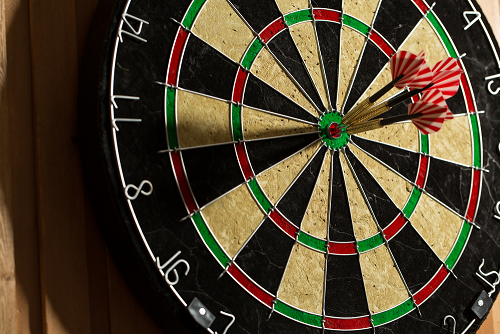

In [12]:
i = Image(filename='IntroKeras23.png')
display(i)

#A multi-class model
#You're going to build a model that predicts who threw which dart only based on where that dart landed! (That is the dart's 
#x and y coordinates on the board.)

#This problem is a multi-class classification problem since each dart can only be thrown by one of 4 competitors. 
#So classes/labels are mutually exclusive, and therefore we can build a neuron with as many output as competitors and use 
#the softmax activation function to achieve a total sum of probabilities of 1 over all competitors.

#Keras Sequential model and Dense layer are already loaded for you to use.

# Instantiate a sequential model
model = Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(Dense(128, input_shape=(2,), activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
  
# Add a dense layer with as many neurons as competitors
model.add(Dense(4, activation='softmax'))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [13]:
#Prepare your dataset
#In the console you can check that your labels, darts.competitor are not yet in a format to be understood by your network. 
#They contain the names of the competitors as strings. You will first turn these competitors into unique numbers,then use the 
#to_categorical() function from keras.utils to turn these numbers into their one-hot encoded representation.

#This is useful for multi-class classification problems, since there are as many output neurons as classes and for every 
#observation in our dataset we just want one of the neurons to be activated.

#The dart's dataset is loaded as darts. Pandas is imported as pd. Let's prepare this dataset!

import pandas as pd

darts=pd.read_csv('darts.csv')
coord = darts.drop(['competitor'], axis=1).values

# Transform into a categorical variable
darts.competitor = pd.Categorical(darts.competitor)

# Assign a number to each category (label encoding)
darts.competitor = darts.competitor.cat.codes 

# Import to_categorical from keras utils module
from tensorflow.keras.utils import to_categorical

coordinates = darts.drop(['competitor'], axis=1)
# Use to_categorical on your labels
competitors = to_categorical(darts.competitor)

# Now print the one-hot encoded labels
print('One-hot encoded competitors: \n',competitors)

One-hot encoded competitors: 
 [[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]]


In [14]:
coord_train, coord_test, competitors_train, competitors_test = train_test_split(coord, competitors, test_size=0.33, random_state=42)

# Fit your model to the training data for 200 epochs
model.fit(coord_train,competitors_train,epochs=200)

# Evaluate your model accuracy on the test data
accuracy = model.evaluate(coord_test, competitors_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Epoch 1/200
17/17 [==============================] - 0s 2ms/step - loss: 1.3732 - accuracy: 0.2799
Epoch 2/200
17/17 [==============================] - 0s 2ms/step - loss: 1.3309 - accuracy: 0.3937
Epoch 3/200
17/17 [==============================] - 0s 2ms/step - loss: 1.2807 - accuracy: 0.4422
Epoch 4/200
17/17 [==============================] - 0s 2ms/step - loss: 1.2146 - accuracy: 0.5299
Epoch 5/200
17/17 [==============================] - 0s 2ms/step - loss: 1.1416 - accuracy: 0.5765
Epoch 6/200
17/17 [==============================] - 0s 2ms/step - loss: 1.0529 - accuracy: 0.5951
Epoch 7/200
17/17 [==============================] - 0s 2ms/step - loss: 0.9704 - accuracy: 0.6250
Epoch 8/200
17/17 [==============================] - 0s 2ms/step - loss: 0.9055 - accuracy: 0.6063
Epoch 9/200
17/17 [==============================] - 0s 2ms/step - loss: 0.8616 - accuracy: 0.6418
Epoch 10/200
17/17 [==============================] - 0s 2ms/step - loss: 0.8506 - accuracy: 0.6679
Epoch 11/

17/17 [==============================] - 0s 2ms/step - loss: 0.5654 - accuracy: 0.7966
Epoch 84/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.7985
Epoch 85/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5667 - accuracy: 0.8041
Epoch 86/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5651 - accuracy: 0.7892
Epoch 87/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5703 - accuracy: 0.7966
Epoch 88/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5679 - accuracy: 0.8004
Epoch 89/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5577 - accuracy: 0.7985
Epoch 90/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.7948
Epoch 91/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5575 - accuracy: 0.7985
Epoch 92/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5598 - accuracy: 0.8041
Epoch 93/200


17/17 [==============================] - 0s 2ms/step - loss: 0.5062 - accuracy: 0.8022
Epoch 165/200
17/17 [==============================] - 0s 2ms/step - loss: 0.4995 - accuracy: 0.8116
Epoch 166/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5294 - accuracy: 0.7929
Epoch 167/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5215 - accuracy: 0.7948
Epoch 168/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5545 - accuracy: 0.7780
Epoch 169/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5242 - accuracy: 0.7910
Epoch 170/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.8004
Epoch 171/200
17/17 [==============================] - 0s 2ms/step - loss: 0.5098 - accuracy: 0.8041
Epoch 172/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5130 - accuracy: 0.8116
Epoch 173/200
17/17 [==============================] - 0s 1ms/step - loss: 0.5067 - accuracy: 0.8060
Epoc

In [15]:
#Softmax predictions
#Your recently trained model is loaded for you. This model is generalizing well!, that's why you got a high accuracy on 
#the test set.

#Since you used the softmax activation function, for every input of 2 coordinates provided to your model there's an
#output vector of 4 numbers. Each of these numbers encodes the probability of a given dart being thrown by one of the 
#4 possible competitors.

#When computing accuracy with the model's .evaluate() method, your model takes the class with the highest probability as 
#the prediction. np.argmax() can help you do this since it returns the index with the highest value in an array.

#Use the collection of test throws stored in coords_small_test and np.argmax()to check this out!

import numpy as np

coords_small_test=np.array([[0.209048, -0.077398], [0.082103, -0.721407], 
                            [0.198165, -0.674646], [-0.348660, 0.035086], 
                            [0.214726, 0.183894]], dtype='float32')

competitors_small_test= np.array([[0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]], dtype='float32')

# Predict on coords_small_test
preds = model.predict(coords_small_test)

# Print preds vs true values
print("{:45} | {}".format('Raw Model Predictions','True labels'))
for i,pred in enumerate(preds):
  print("{} | {}".format(pred,competitors_small_test[i]))

# Extract the position of highest probability from each pred vector
preds_chosen = [np.argmax(pred) for pred in preds]

# Print preds vs true values
print("{:10} | {}".format('Rounded Model Predictions','True labels'))
for i,pred in enumerate(preds_chosen):
  print("{:25} | {}".format(pred,competitors_small_test[i]))

Raw Model Predictions                         | True labels
[0.28910387 0.01873929 0.68615204 0.00600477] | [0. 0. 1. 0.]
[0.2485059  0.05024736 0.15432708 0.54691964] | [0. 0. 0. 1.]
[0.33979914 0.04487621 0.27953103 0.33579355] | [0. 0. 0. 1.]
[0.8926163  0.01975638 0.07881124 0.00881613] | [1. 0. 0. 0.]
[0.33214206 0.01616619 0.645517   0.0061748 ] | [0. 0. 1. 0.]
Rounded Model Predictions | True labels
                        2 | [0. 0. 1. 0.]
                        3 | [0. 0. 0. 1.]
                        0 | [0. 0. 0. 1.]
                        0 | [1. 0. 0. 0.]
                        2 | [0. 0. 1. 0.]


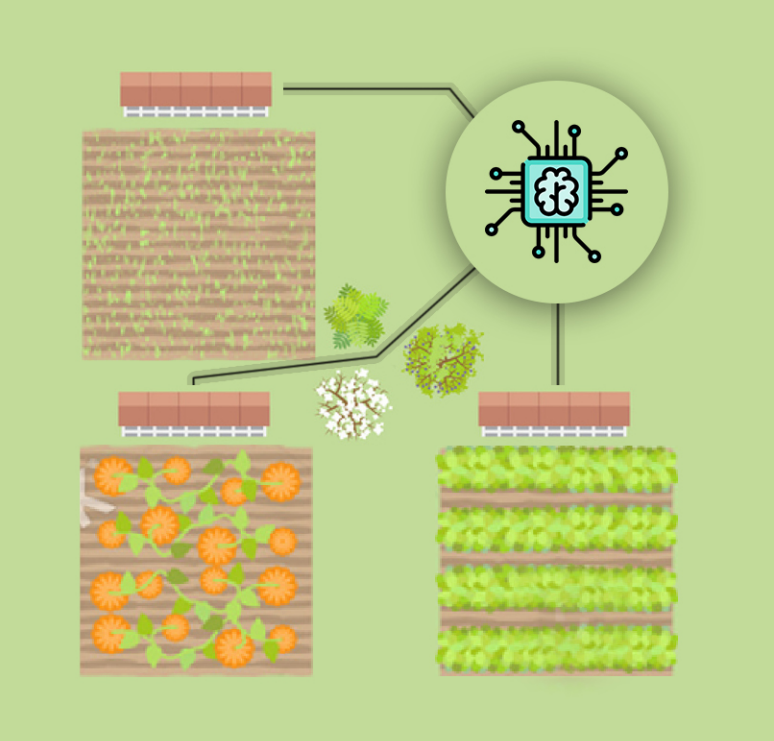

In [16]:
#An irrigation machine
#You're going to automate the watering of farm parcels by making an intelligent irrigation machine. Multi-label classification 
#problems differ from multi-class problems in that each observation can be labeled with zero or more classes. So classes/labels
#are not mutually exclusive, you could water all, none or any combination of farm parcels based on the inputs.

#To account for this behavior what we do is have an output layer with as many neurons as classes but this time, unlike in multi-class problems, each output neuron has a sigmoid activation function. This makes each neuron in the output layer able to output a number between 0 and 1 independently.

#Keras Sequential() model and Dense() layers are preloaded. It's time to build an intelligent irrigation machine!
i = Image(filename='IntroKeras22.png')
display(i)


In [17]:
data=pd.read_csv('irrigation_machine.csv', index_col=0)
parcels = data[['parcel_0', 'parcel_1', 'parcel_2']].to_numpy()
sensors = data.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1).to_numpy()

sensors_train, sensors_test, parcels_train, parcels_test = train_test_split(sensors, parcels, test_size=0.3, stratify=parcels)


# Instantiate a Sequential model
model = Sequential()

# Add a hidden layer of 64 neurons and a 20 neuron's input
model.add(Dense(64, input_shape=(20,), activation='relu'))

# Add an output layer of 3 neurons with sigmoid activation
model.add(Dense(3, activation='sigmoid'))


# Compile your model with binary crossentropy loss
model.compile(optimizer='adam',
           loss = 'binary_crossentropy',
           metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 64)                1344      
                                                                 
 dense_6 (Dense)             (None, 3)                 195       
                                                                 
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train for 100 epochs using a validation split of 0.2
model.fit(sensors_train, parcels_train, epochs = 100, validation_split = 0.3, verbose=0)

# Predict on sensors_test and round up the predictions
preds = model.predict(sensors_test)
preds_rounded = np.round(preds)

# Print rounded preds
print('Rounded Predictions: \n', preds_rounded)

# Evaluate your model's accuracy on the test data
accuracy = model.evaluate(sensors_test, parcels_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

Rounded Predictions: 
 [[0. 1. 0.]
 [0. 1. 0.]
 [1. 1. 0.]
 ...
 [1. 1. 1.]
 [1. 1. 1.]
 [0. 1. 0.]]
19/19 [==============================] - 0s 2ms/step - loss: 0.7176 - accuracy: 0.5717
Accuracy: 0.5716666579246521


In [ ]:
#The history callback
#The history callback is returned by default every time you train a model with the .fit() method. To access these metrics 
#you can access the history dictionary parameter inside the returned h_callback object with the corresponding keys.

#The irrigation machine model you built in the previous lesson is loaded for you to train, along with its features and labels 
#now loaded as X_train, y_train, X_test, y_test. This time you will store the model's historycallback and use the 
#validation_data parameter as it trains.

#You will plot the results stored in history with plot_accuracy() and plot_loss(), two simple matplotlib functions. 
#You can check their code in the console by pasting show_code(plot_loss).

#Let's see the behind the scenes of our training!

In [168]:
import matplotlib.pyplot as plt
def plot_loss(loss,val_loss):
  plt.figure()
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper right')
  plt.show()
    
def plot_accuracy(acc,val_acc):
  # Plot training & validation accuracy values
  plt.figure()
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  plt.show()

In [187]:
# Train your model and save its history
h_callback = model.fit(sensors_train, parcels_train, epochs = 50,
               validation_data=(sensors_test, parcels_test))

# Plot train vs test loss during training
plot_loss(h_callback.history['loss'], h_callback.history['val_loss'])

# Plot train vs test accuracy during training
plot_accuracy(h_callback.history['accuracy'], h_callback.history['val_accuracy'])

Epoch 1/50


ValueError: in user code:

    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_36" is incompatible with the layer: expected shape=(None, 4), found shape=(None, 20)
